# Задание 2. Персептрон

Написать и обучить многослойный персептрон для аппроксимации функции косинуса. Выбор количества слоев и нейронов, а также функций активации остается на усмотрение студента. Отобразить график аппроксимации для тестовой выборки (на одной диаграмме реальный косинус и поверх него то, что выдала нейросеть) и график обучения (значение функции стоимости с каждой эпохой). Посчитать R^2.

In [93]:
import numpy as np

## Data

In [94]:
x_train = np.arange(-2*np.pi, 2*np.pi, 0.01).reshape((-1, 1))
y_train = np.cos(x_train).reshape((-1, 1))

x_test = np.arange(-4*np.pi, 4*np.pi, 0.01).reshape((-1, 1))
y_test = np.cos(x_test).reshape((-1, 1))


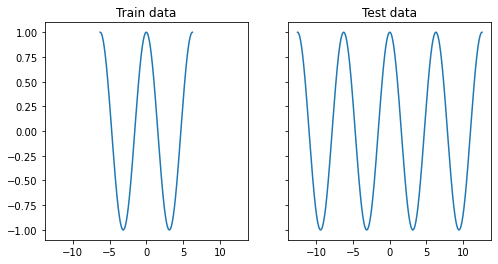

In [95]:
from visualization import data_visualization
data_visualization(x_train, y_train, x_test, y_test)

## Modelling

Сделаем 15 нейронов на первом слое, 10 на втором и 1 в качестве выходного

In [96]:
HIDDEN_LAYER_SIZE = 30
EPOCHS_NUM = 5000

In [97]:
from layers import FullyConnectedLayer, SigmoidLayer
from optimizers import Adam, L2
from model import Perceptron
from metrics import MSE


model = Perceptron(loss=MSE)
model.add_layer(FullyConnectedLayer(1, HIDDEN_LAYER_SIZE))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(HIDDEN_LAYER_SIZE, HIDDEN_LAYER_SIZE))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(HIDDEN_LAYER_SIZE, 10))
model.add_layer(SigmoidLayer())
model.add_layer(FullyConnectedLayer(10, 1))
model.add_layer(SigmoidLayer())


loss, best_weights = model.fit(
    x_train, y_train, lr=1e-3, reg=L2(0.0001), optimizer=Adam(model), num_epochs=EPOCHS_NUM)


0 Loss:  6571971.280473875
250 Loss:  5.397089635722173
500 Loss:  2.29970920187949
750 Loss:  9.031095850050187
1000 Loss:  42.883471866887135
1250 Loss:  5.06639289375268
1500 Loss:  19.348773827779894
1750 Loss:  1.2461039216845844
2000 Loss:  0.06781624806207923
2250 Loss:  2.470346487874403
2500 Loss:  23.68169851569155
2750 Loss:  75.3532254240428
3000 Loss:  40.90399970502197
3250 Loss:  29.843533634548066
3500 Loss:  20.07785556332927
3750 Loss:  1.5455061847327884
4000 Loss:  0.6874488806790001
4250 Loss:  65.8974822025867
4500 Loss:  3.8284787055567215
4750 Loss:  0.16692166707381614


In [98]:
model.upload_weights(best_weights)
predict_on_test = -model.forward(x_test % (2*np.pi)-np.pi)

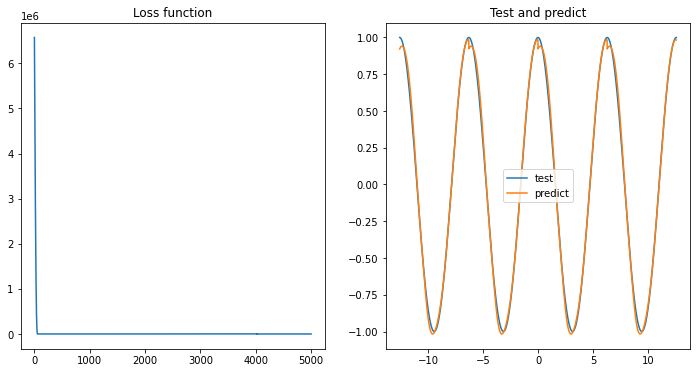

In [99]:
from visualization import model_visualization
model_visualization(loss, x_test, y_test, predict_on_test)